# Sentiment Analysis (Amazon-Fine-Food-Reviews dataset)

In this notebook, we will perform sentiment analysis using the Amazon Fine Food Reviews dataset. The analysis will be conducted using two techniques:
- **VADER** (Valence Aware Dictionary and Sentiment Reasoner): A lexicon and rule-based sentiment analysis tool that is specifically attuned to sentiments expressed in social media.
- **Pretrained Model Roberta** (Huggingface pipeline): A transformer-based model fine-tuned on large datasets for natural language understanding tasks.

Let's dive into the process step-by-step:


## 1. Import Modules and Read Data

In this section, we import the necessary libraries and load the dataset. The libraries include:
- `pandas` for data manipulation and analysis.
- `numpy` for numerical computations.
- `matplotlib` and `seaborn` for data visualization.
- `nltk` for natural language processing tasks.


In [2]:
# import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

In [3]:
plt.style.use('seaborn-v0_8')

In [4]:
# read data
df = pd.read_csv('Reviews.csv')
df.shape

(568454, 10)

In [5]:
# reducing the dataset
df = df.iloc[:200000, :]
df.shape

(200000, 10)

### Loading and Exploring the Dataset
In this section, we will perform basic exploratory data analysis (EDA) to understand the structure and content of the dataset. This includes checking for missing values, examining the distribution of ratings, and looking at some sample reviews.

In [6]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   Id                      200000 non-null  int64 
 1   ProductId               200000 non-null  object
 2   UserId                  200000 non-null  object
 3   ProfileName             199988 non-null  object
 4   HelpfulnessNumerator    200000 non-null  int64 
 5   HelpfulnessDenominator  200000 non-null  int64 
 6   Score                   200000 non-null  int64 
 7   Time                    200000 non-null  int64 
 8   Summary                 199992 non-null  object
 9   Text                    200000 non-null  object
dtypes: int64(5), object(5)
memory usage: 15.3+ MB


In [8]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

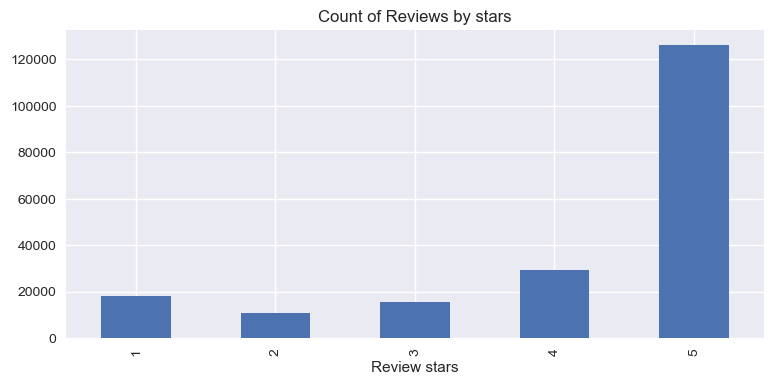

In [9]:
df['Score'].value_counts() \
            .sort_index() \
            .plot(kind='bar', 
                  title='Count of Reviews by stars',
                 figsize=(9, 4)) \
            .set_xlabel('Review stars')
plt.show()

### nltk basics

In [10]:
ex = df['Text'][17]
ex

'I am very satisfied with my Twizzler purchase.  I shared these with others and we have all enjoyed them.  I will definitely be ordering more.'

In [11]:
tok = nltk.word_tokenize(ex)
tok[:15]

['I',
 'am',
 'very',
 'satisfied',
 'with',
 'my',
 'Twizzler',
 'purchase',
 '.',
 'I',
 'shared',
 'these',
 'with',
 'others',
 'and']

In [12]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\ishan\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [13]:
# parts of speech (pos_tag)
tag = nltk.pos_tag(tok)
tag[:15]

[('I', 'PRP'),
 ('am', 'VBP'),
 ('very', 'RB'),
 ('satisfied', 'JJ'),
 ('with', 'IN'),
 ('my', 'PRP$'),
 ('Twizzler', 'NNP'),
 ('purchase', 'NN'),
 ('.', '.'),
 ('I', 'PRP'),
 ('shared', 'VBD'),
 ('these', 'DT'),
 ('with', 'IN'),
 ('others', 'NNS'),
 ('and', 'CC')]

In [14]:
# chunks the tokens together
chunk = nltk.chunk.ne_chunk(tag)
print(chunk[:10])

[('I', 'PRP'), ('am', 'VBP'), ('very', 'RB'), ('satisfied', 'JJ'), ('with', 'IN'), ('my', 'PRP$'), ('Twizzler', 'NNP'), ('purchase', 'NN'), ('.', '.'), ('I', 'PRP')]


## 2. Sentiment Analysis with VADER

VADER (Valence Aware Dictionary and Sentiment Reasoner) is a lexicon and rule-based sentiment analysis tool that is particularly attuned to social media texts. It provides a compound score which is a normalized, weighted composite score. 

- We'll use a tool called SentimentIntensityAnalyzer from the NLTK library to measure the sentiment of text.

- Breaking Down the Text: This tool works by analyzing individual words (like a "bag of words").
- It removes stop words (like "the" or "a").
- It assigns scores to each remaining word based on its positive, negative, or neutral sentiment.
- Finally, it combines these scores to give an overall sentiment rating for the entire text.

#### Note: This approach does not account for relationship between words, which is actually very important in terms of human speech. But this is a good start.

In [15]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [16]:
text = ['The cake was delicious.', 
        'I missed the bus.', 
        "We're going on a picnic!", 
        "The laundry needs folding.", 
        "The movie left me speechless.",
        "This is very bad."]
for sent in text:
    print(sia.polarity_scores(sent))

{'neg': 0.0, 'neu': 0.448, 'pos': 0.552, 'compound': 0.5719}
{'neg': 0.524, 'neu': 0.476, 'pos': 0.0, 'compound': -0.296}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.558, 'neu': 0.442, 'pos': 0.0, 'compound': -0.5849}


In [17]:
print(ex)
print(sia.polarity_scores(ex))

I am very satisfied with my Twizzler purchase.  I shared these with others and we have all enjoyed them.  I will definitely be ordering more.
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8883}


In [19]:
# Run Polarity score on dataset
scores = {}
for i, row in tqdm(df.iterrows()):
    text = row['Text']
    scores[row['Id']] = sia.polarity_scores(text)

0it [00:00, ?it/s]

In [27]:
for val in range(5):
    print(scores[df.head()['Id'].values[val]])

{'neg': 0.0, 'neu': 0.695, 'pos': 0.305, 'compound': 0.9441}
{'neg': 0.138, 'neu': 0.862, 'pos': 0.0, 'compound': -0.5664}
{'neg': 0.091, 'neu': 0.754, 'pos': 0.155, 'compound': 0.8265}
{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
{'neg': 0.0, 'neu': 0.552, 'pos': 0.448, 'compound': 0.9468}


In [18]:
scores = pd.DataFrame(scores).T  # T for transpose
scores = scores.reset_index().rename(columns={'index':'Id'})
scores = scores.merge(df, how='left')

In [19]:
# we have sentiment scores in the dataframe now
scores.head()

,Id,neg,neu,pos,compound,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Plot Results - VADER

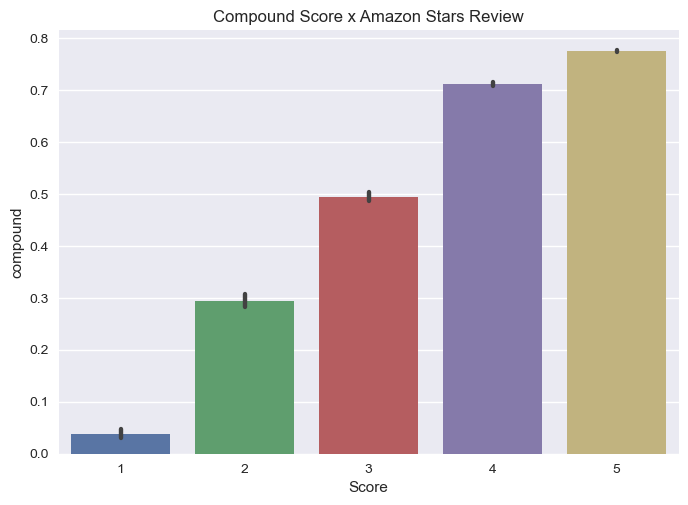

In [20]:
sns.barplot(data=scores, x='Score', y='compound') \
    .set_title("Compound Score x Amazon Stars Review")
plt.show()

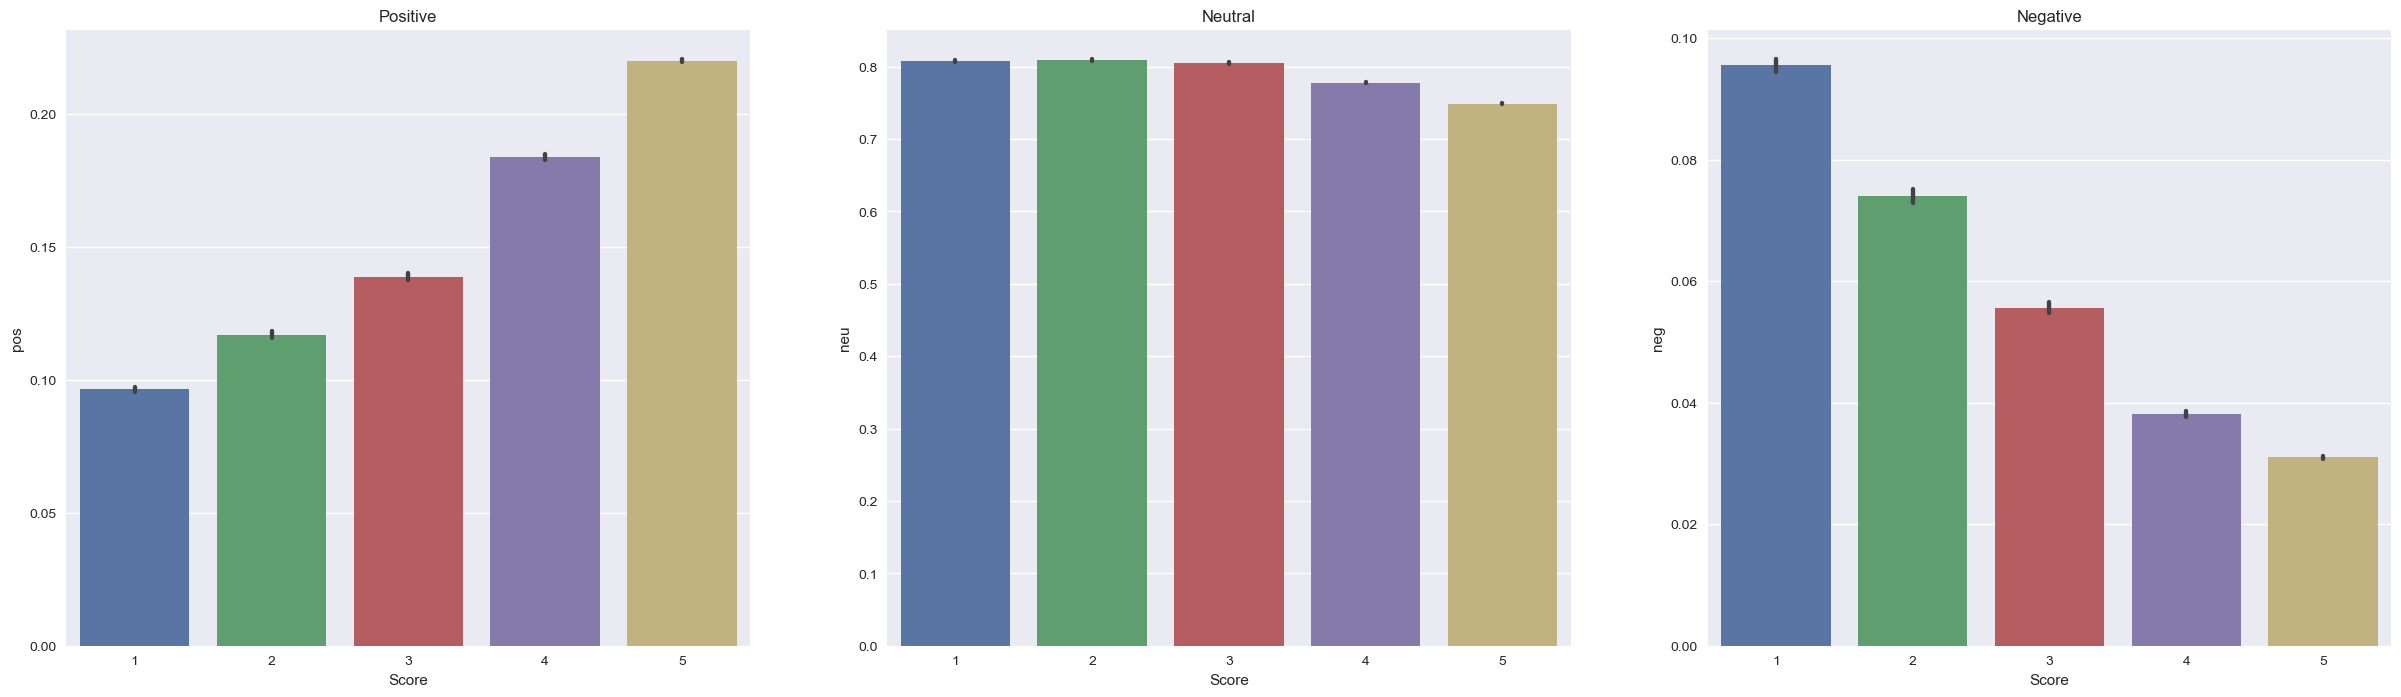

In [21]:
fig, axs = plt.subplots(1, 3, figsize=(30, 8))
sns.barplot(data=scores, x='Score', y='pos', ax=axs[0])
sns.barplot(data=scores, x='Score', y='neu', ax=axs[1])
sns.barplot(data=scores, x='Score', y='neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

## 3. Sentiment Analysis with Roberta
Roberta (A Robustly Optimized BERT Pretraining Approach) is a transformer model developed by Huggingface for various NLP tasks. It has been pretrained on a large corpus of data and fine-tuned for sentiment analysis. 

- Powerful Language Models: We will leverage model trained on large amounts of text data, allowing the model to understand language nuances.
- Beyond Words: Context is Key - Transformer models excel at understanding not just individual words, but also how they relate to each other, capturing the deeper meaning of the sentence.

In [22]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
from scipy.special import softmax
from tqdm import tqdm

# Check if CUDA is available and set device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [23]:
device

device(type='cuda')

In [33]:
# Load model directly

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment-latest")
model.to(device)

c:\Users\ishan\anaconda3\Lib\site-packages\huggingface_hub\file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model)

RobertaForSequenceClassification(
  (roberta): RobertaModel(
    (embeddings): RobertaEmbeddings(
      (word_embeddings): Embedding(50265, 768, padding_idx=1)
      (position_embeddings): Embedding(514, 768, padding_idx=1)
      (token_type_embeddings): Embedding(1, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): RobertaEncoder(
      (layer): ModuleList(
        (0-11): 12 x RobertaLayer(
          (attention): RobertaAttention(
            (self): RobertaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): RobertaSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
             

In [34]:
tokenizer.save_pretrained("./model/")
model.save_pretrained("./model/")

In [35]:
print(ex)
print(sia.polarity_scores(ex))

I am very satisfied with my Twizzler purchase.  I shared these with others and we have all enjoyed them.  I will definitely be ordering more.
{'neg': 0.0, 'neu': 0.61, 'pos': 0.39, 'compound': 0.8883}


In [36]:
# using roberta model

# return_tensors='pt' (transformers library) instructs the tokenizer to return the encoded text in a PyTorch tensor format
encoded_text = tokenizer(ex, return_tensors='pt').to(device)

# **kwargs syntax to unpack the encoded_text dictionary as keyword arguments 
output = model(**encoded_text)
print(output)
print(output[0][0])

# .detach() separate the tensor and gradient
records = output[0][0].detach().cpu().numpy()
records = softmax(records)
print(records)
records_dict = {
    'neg_roberta' : records[0],
    'neu_roberta' : records[1],
    'pos_roberta' : records[2]
}
print(records_dict)

SequenceClassifierOutput(loss=None, logits=tensor([[-2.4182, -1.1032,  3.6192]], device='cuda:0',
       grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([-2.4182, -1.1032,  3.6192], device='cuda:0', grad_fn=<SelectBackward0>)
[0.00236106 0.008795   0.9888439 ]
{'neg_roberta': 0.002361062, 'neu_roberta': 0.008794997, 'pos_roberta': 0.9888439}


In [37]:
def roberta_polarity_scores(text):
    encoded_text = tokenizer(text, return_tensors='pt', padding='max_length', truncation=True, max_length=512).to(device)
    output = model(**encoded_text)
    records = output[0][0].detach().cpu().numpy()
    records = softmax(records)
    records_dict = {
        'roberta_neg' : records[0],
        'roberta_neu' : records[1],
        'roberta_pos' : records[2]
    }
    return records_dict

### Run Polarity Scores test on the dataset

In [41]:
res = {}

l = ['neg', 'neu', 'pos', 'compound']
errId = []

for i, row in tqdm(df.iterrows()):
    try:
        text = row['Text']

        vader_res = sia.polarity_scores(text)
        roberta_res = roberta_polarity_scores(text)
        
        # rename vader keys
        for i in range(4):
            vader_res['vader_'+l[i]] = vader_res[l[i]]
            del vader_res[l[i]]
            i=i+1

        combined = {**vader_res, **roberta_res}
        res[row['Id']] = combined
        
    except RuntimeError:
        errId.append(row['Id'])



42096it [1:07:23, 10.41it/s]


KeyboardInterrupt: 

In [42]:
res_df = pd.DataFrame(res).T  # T for transpose
res_df = res_df.reset_index().rename(columns={'index':'Id'})
res_df = res_df.merge(df.head(42096), how='left')

In [43]:
res_df.head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,0.000,0.695,0.305,0.9441,0.010578,0.038816,0.950607,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,0.138,0.862,0.000,-0.5664,0.716768,0.271225,0.012007,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,0.091,0.754,0.155,0.8265,0.005176,0.077858,0.916966,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,0.000,1.000,0.000,0.0000,0.002919,0.047125,0.949957,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,0.000,0.552,0.448,0.9468,0.004527,0.009283,0.986190,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


## 3. Compare Results between VADER and Roberta
After performing sentiment analysis using both VADER and Roberta, it's important to compare their results to understand their performances. 

In this section, we will:
- Visualize the distribution of sentiment scores from both methods.
- Compare the overall sentiment predictions (positive, negative, neutral) from each model.

This comparison will help us determine which model performs better on this dataset.

c:\Users\ishan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ishan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ishan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\ishan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

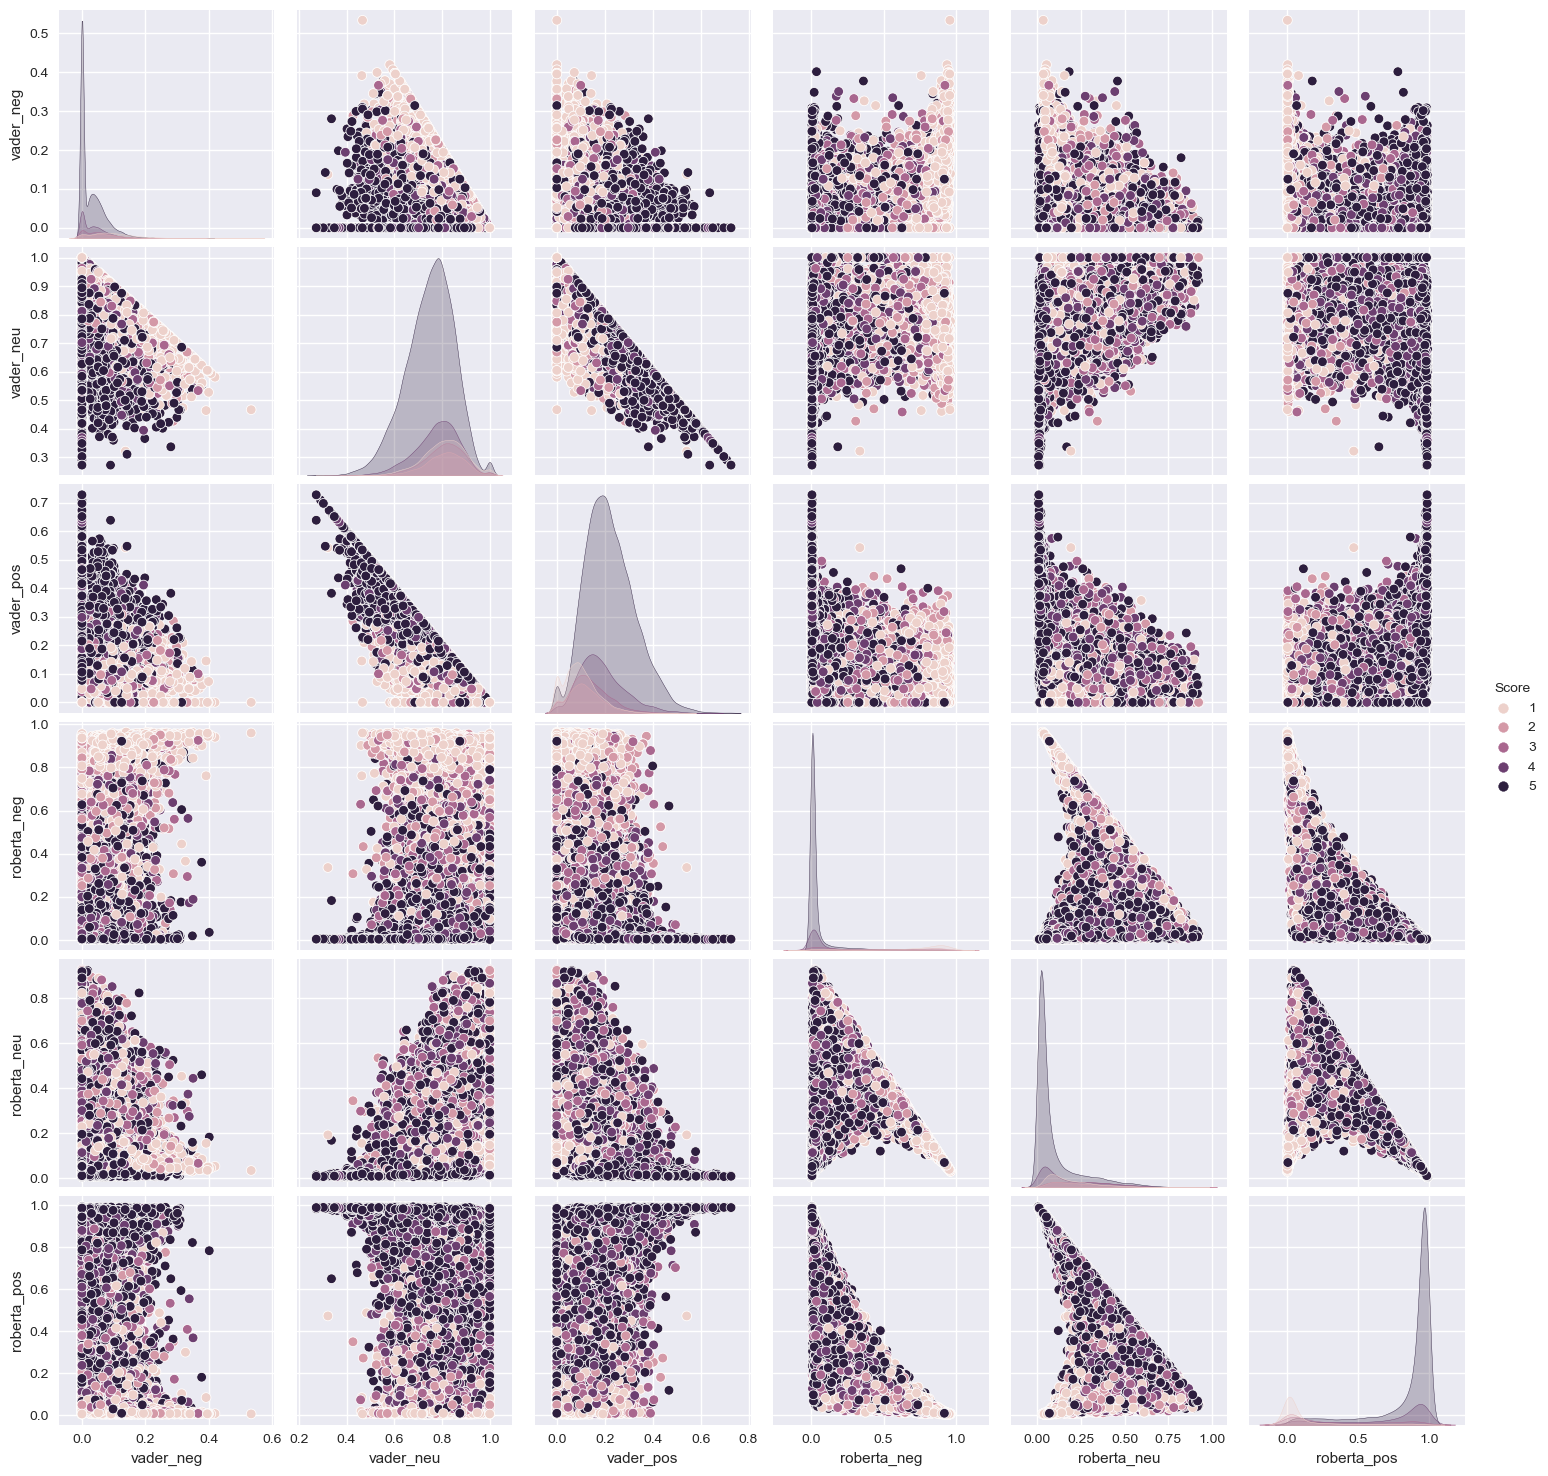

In [44]:
sns.pairplot(data=res_df, 
             vars=['vader_neg', 'vader_neu', 'vader_pos',
            'roberta_neg', 'roberta_neu', 'roberta_pos'],
            hue='Score')
plt.show()

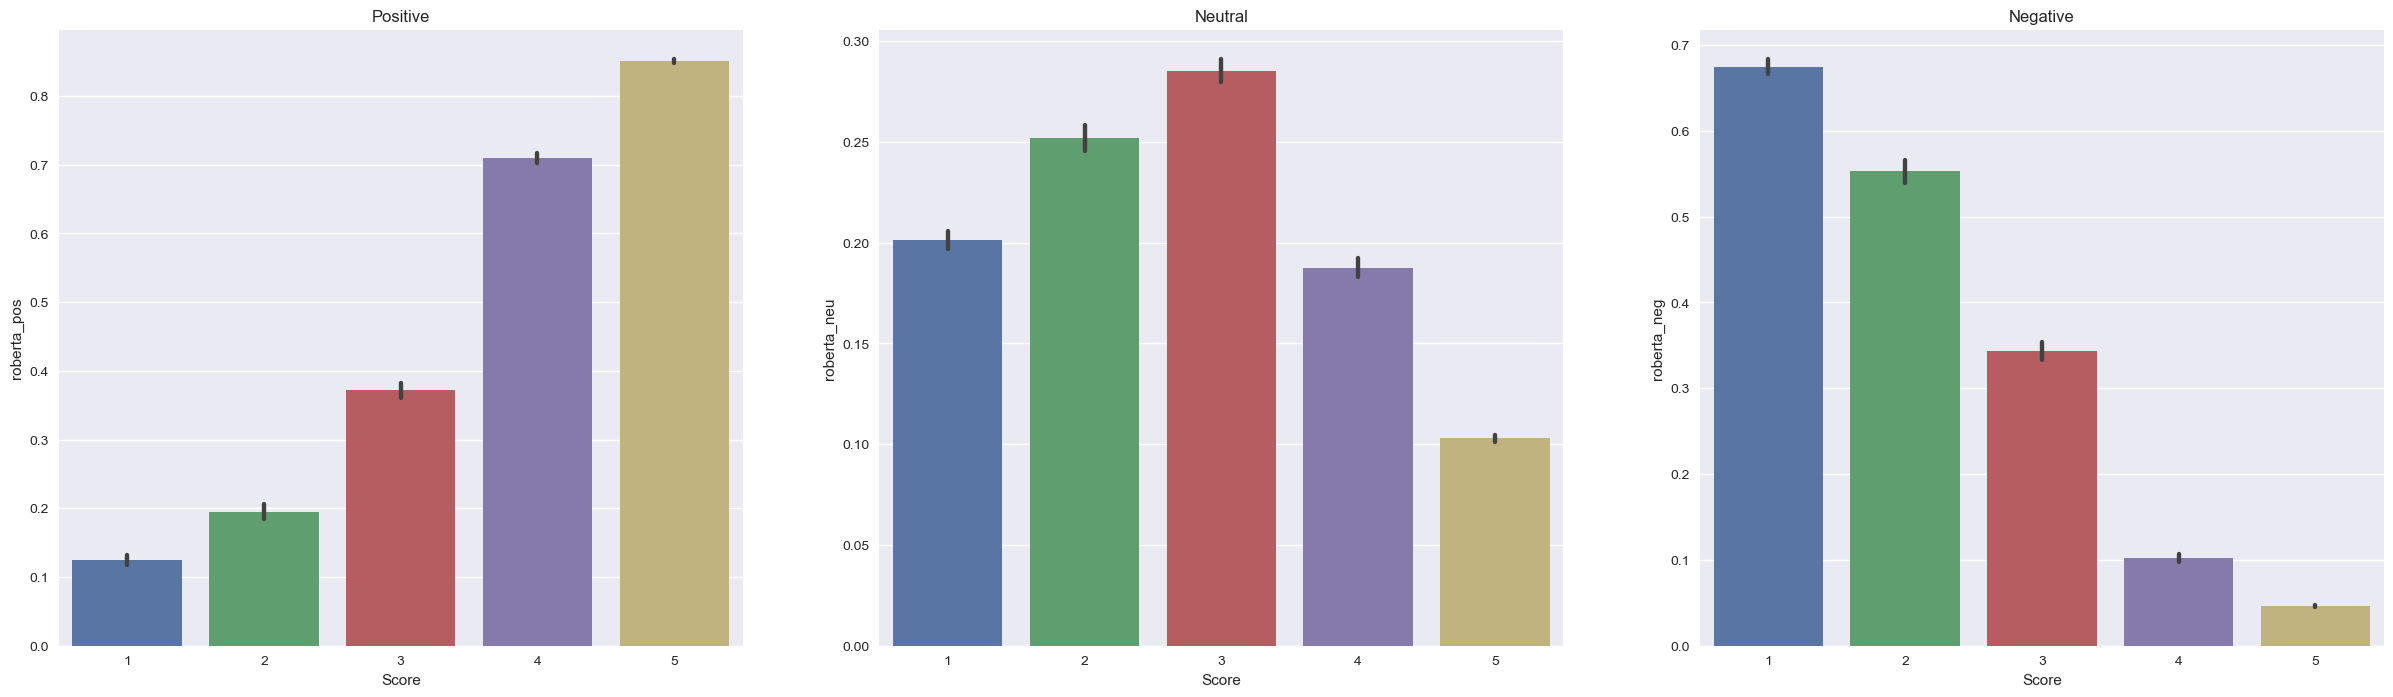

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(30, 8))
sns.barplot(data=res_df, x='Score', y='roberta_pos', ax=axs[0])
sns.barplot(data=res_df, x='Score', y='roberta_neu', ax=axs[1])
sns.barplot(data=res_df, x='Score', y='roberta_neg', ax=axs[2])
axs[0].set_title('Positive')
axs[1].set_title('Neutral')
axs[2].set_title('Negative')
plt.show()

## 4. Review Examples
- Analyze reviews with large discrepancies between model sentiment and star rating.
- Focus on cases where the model assigns positive sentiment to 1-star reviews and negative sentiment to 5-star reviews.

In [46]:
data = res_df.copy()

In [47]:
data.query('Score == 1').sort_values('roberta_pos', ascending=False).head()

,Id,vader_neg,vader_neu,vader_pos,vader_compound,roberta_neg,roberta_neu,roberta_pos,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
4380,4381,0.0,0.799,0.201,0.7003,0.004090,0.014011,0.981898,B004391DK0,AOYBPBZLGSDOK,gram,0,0,1,1350604800,gram,Bisquick GF is easy to use. Pancakes and muffi...
27325,27326,0.0,0.771,0.229,0.8999,0.003748,0.014379,0.981873,B001LFW8F8,AZAV8CL5GVZ9M,"Nellie A. Fedee ""N Fedee""",0,8,1,1263081600,Great Gift,This was a great gift for my son & his wife - ...
39232,39233,0.0,0.734,0.266,0.8883,0.003737,0.019943,0.976321,B0002YB21A,A1W3TUKVZW0NE3,John M. Tucker,3,36,1,1173312000,kadoya pure sesame oil,Ads a very pleasant taste to my stir fry exper...
35596,35597,0.0,0.823,0.177,0.6059,0.006043,0.021355,0.972601,B005GRAT4O,AZ6GY3NXSYTJ3,ks,5,9,1,1305763200,WAY OVERPRICED!,"I love this food, my daughter loves the food, ..."
35227,35228,0.0,0.799,0.201,0.7208,0.003963,0.024063,0.971974,B003JAHB32,A3U7JXTZJWRQFL,"Guoan Jiang ""WenJ""",2,4,1,1346976000,I Highly recommended.,"I Highly recommended."". Hei, customer!! If you..."


In [49]:
# most positive sentiment 1-star review by Roberta
data.query('Score == 1').sort_values('roberta_pos', ascending=False)['Text'].values[0]

'Bisquick GF is easy to use. Pancakes and muffins are very<br />tasty. The product is quick and easy to use. It makes my day.  Gram'

In [50]:
# most positive sentiment 1-star review by VADER
data.query('Score == 1').sort_values('vader_pos', ascending=False)['Text'].values[0]

'I love coffee, I love mochas, I love amaretto.<br />This product however was disgusting !!!'

In [51]:
# most negative sentiment 5-star review by Roberta
data.query('Score == 5').sort_values('roberta_neg', ascending=False)['Text'].values[0]

'They have a bad taste,i finish giving them away because my son started to cry everytime i tried to give these.I prefer Beech nut or Gerber.Yuck!'

In [52]:
# most negative sentiment 5-star review by VADER
data.query('Score == 5').sort_values('vader_neg', ascending=False)['Text'].values[0]

'pure smooth not sugar sweet, best for the price since Sams club stop selling syrup'

## 5. Conclusion
In this notebook, we performed sentiment analysis on the Amazon Fine Food Reviews dataset using VADER and Roberta models. Here are the key takeaways:

1. **VADER** provided a quick and interpretable sentiment score based on predefined rules and a lexicon, making it suitable for social media texts and quick analyses.
2. **Roberta** utilized deep learning to capture more nuanced sentiment patterns, offering high accuracy at the cost of computational resources.

Future work could involve:
- Experimenting with other sentiment analysis models and techniques.
- Fine-tuning the Roberta model on a specific subset of the data.
- Applying these methods to different datasets for broader insights.

Overall, both techniques have their own advantages and can be chosen based on the specific needs of the task.
